# Operational laws


## Little's Law for Open System

For any ergodyc open system

>E[N]=lambda * E[T]

Where *lambda* - average outside rate into the system. This rate equals to *X* - throughput rate of the system. *E[N]* - expected number of jobs in the system, E[T] - expected time a job spends in the system.

>E[N_q] = lambda * E[T_q]

where N_q - number of jobs that are waiting in queues.

## Little's Law for a Closed Batch System (Zero Think Time).

> N = X * E[T]

where N - multiprogramming level of the system

## Response Time Law for Closed interactive Systems

> E[R] = N/X - E[Z]

where N - multiprogramming level (number of users), X - throwput, E[Z] - time spent thinking, E[R] - exprected response time

## Utilization Law

> ro_i = lambda_i / mu_i = lambda_i * E[S_i]

where ro_i - utilization of the i-th server, lambda_i - average arrival rate into the server (equals to server's throughtput rate X_i), mu_i = 1/E[S_i] - mean service rate at the server


## Forced Flow Law

>X_i = E[V_i] * X

X - system throghtput, X_i - thoughput at device i, E[V_i] - expected number of visits to device i per job

## Bottleneck Law

> ro_i = X * E[D_i]

where D_i - total service demand on device i for all visits of a single job. Over a long observation period T:

> D_i = B_i/C

where B_i - total time during T that device i is busy and C - total number of system completions during time T.

## Asymptotic bounds for closed system

For any closed interactive system with N terminals

>X <= min(N/(D + E[Z], 1/D_max)
>E[R] >= max(D, N * D_max - E[Z])

where

> D = sum(i=1, m) of E[D_i]
> D_max = max{E[D_i]}

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

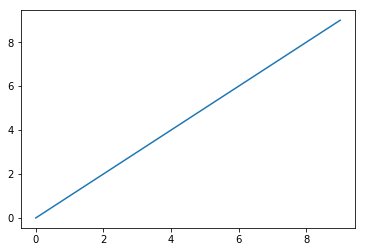

In [6]:
x = range(10)
plt.plot(x, x)

### Example 1

In [84]:
system = {
    "stats": {
        "Z": 18, # seconds        
    },
    "devices": {
        "cpu": {
            "D": 5, # seconds
        },
        "disk_a": {
            "D": 4, # seconds
        },
        "disk_b": {
            "D": 3, # seconds
        },
    },
}


def calculate_stats(system):
    """Calculates D and D_max from D of various system parts"""
    for device in system["devices"].values():
        if "B" in device and "C" in system["stats"]:
            device["D"] = device["B"] / system["stats"]["C"]  # secs / job
        if "C" in device and "C" in system["stats"]:
            device["V"] = device["C"] / system["stats"]["C"]  # visits / job
        if "B" in device and "C" in device:
            device["S"] = device["B"] / device["C"]

    system["stats"]["D_max"] = max(device["D"] for device in system["devices"].values())
    system["stats"]["D"] = sum(device["D"] for device in system["devices"].values())
    system["stats"]["N_star"] = (system["stats"]["D"] + system["stats"]["Z"]) / system["stats"]["D_max"]

    
calculate_stats(system)
system["stats"]

{'D': 12, 'D_max': 5, 'N_star': 6.0, 'Z': 18}

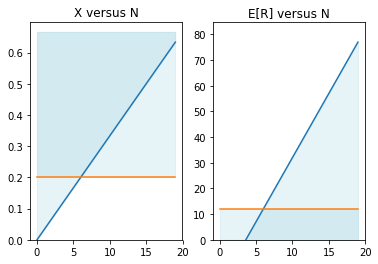

In [62]:
def draw_asymptotes(system, max_n):
    stats = system["stats"]
    
    throughput = plt.subplot(1,2,1)
    throughput.set_title("X versus N")

    # throwput limits
    xs = range(max_n)
    slope = 1 / (stats["D"] + stats["Z"])
    max_throughput = 1 / stats["D_max"]
    
    ys1 = [x * slope for x in xs]
    ys2 = [max_throughput for _ in xs]
    ys_top = [max_n * slope for x in xs]

    throughput.plot(xs, ys1)
    throughput.fill_between(xs, ys1,  ys_top, color='lightblue', alpha=0.3)
    throughput.plot(xs, ys2)
    throughput.fill_between(xs, ys2,  ys_top, color='lightblue', alpha=0.3)
    throughput.set_ylim(ymin=0, ymax=ys1[-1] * 1.1)
    
    response_time = plt.subplot(1,2,2)
    response_time.set_title("E[R] versus N")

    slope = stats["D_max"]
    shift = -stats["Z"]
    min_response_time = stats["D"]
       
    ys1 = [(x * slope + shift) for x in xs]
    ys2 = [min_response_time for _ in xs]
    ys_bottom = [0 for _ in xs]
    response_time.plot(xs, ys1)
    response_time.fill_between(xs, ys_bottom,  ys1, color='lightblue', alpha=0.3)
    response_time.plot(xs, ys2)
    response_time.fill_between(xs, ys_bottom,  ys2, color='lightblue', alpha=0.3)
    response_time.set_ylim(ymin=0, ymax=ys1[-1] * 1.1)

    plt.show()

draw_asymptotes(system, 20)

### Example 2

In [90]:
import copy
import pprint

system1 = {
    "stats": {
        "T": 650, # seconds
        "C": 200, # jobs
        "Z": 15, # seconds
        "N": 20, # users
    },
    "devices": {
        "cpu": {
            "B": 400, # seconds
            "C": 200, # jobs
        },
        "slowdisk": {
            "B": 100,  # seconds
            "C": 2000 # jobs
        },
        "fastdisk": {
            "B": 600,  # seconds
            "C": 20000,  # jobs
        },
    }
}
# try to insert faster cpu
system2 = copy.deepcopy(system1)
system2["devices"]["cpu"]["B"] = 200 # seconds

# try to insert additional disk
system3 = copy.deepcopy(system1)
system3["devices"]["fastdisk"] = {
    "B": 300,
    "C": 10000,
}
system3["devices"]["fastdisk2"] = {
    "B": 300,
    "C": 10000,
}

calculate_stats(system1)
calculate_stats(system2)
calculate_stats(system3)
pprint.pprint(system1)
pprint.pprint(system2)
pprint.pprint(system3)

{'devices': {'cpu': {'B': 400, 'C': 200, 'D': 2.0, 'S': 2.0, 'V': 1.0},
             'fastdisk': {'B': 600,
                          'C': 20000,
                          'D': 3.0,
                          'S': 0.03,
                          'V': 100.0},
             'slowdisk': {'B': 100, 'C': 2000, 'D': 0.5, 'S': 0.05, 'V': 10.0}},
 'stats': {'C': 200,
           'D': 5.5,
           'D_max': 3.0,
           'N': 20,
           'N_star': 6.833333333333333,
           'T': 650,
           'Z': 15}}
{'devices': {'cpu': {'B': 200, 'C': 200, 'D': 1.0, 'S': 1.0, 'V': 1.0},
             'fastdisk': {'B': 600,
                          'C': 20000,
                          'D': 3.0,
                          'S': 0.03,
                          'V': 100.0},
             'slowdisk': {'B': 100, 'C': 2000, 'D': 0.5, 'S': 0.05, 'V': 10.0}},
 'stats': {'C': 200,
           'D': 4.5,
           'D_max': 3.0,
           'N': 20,
           'N_star': 6.5,
           'T': 650,
           'Z': 15}

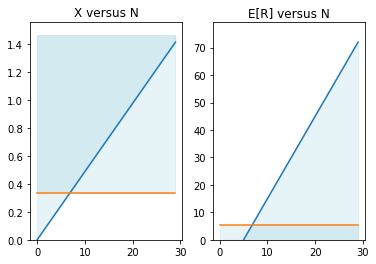

In [87]:
draw_asymptotes(system1, 30)

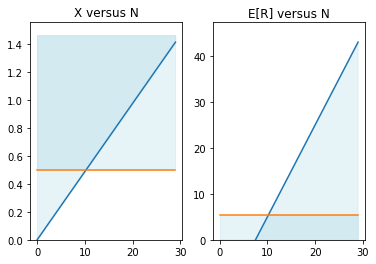

In [91]:
draw_asymptotes(system3, 30)